<a href="https://colab.research.google.com/github/sis00211/4dong4dong/blob/main/In_House_LED_M%26V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/EC3_Data")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('EC3_Clean.csv', index_col = "timestamp", parse_dates=True)
df.head(3)

,FacilityName,Year,Month,FY,Avg. OAT,Precipitation (in),HDD,CDD,Electricity Cost ($),Electricity Demand (KW),Electricity Usage (KWH),Gas (Therms),Gas Cost ($),Steam (mlbs),Steam Cost ($),Total Cost ($),Total Usage (mmBTUs)
timestamp,,,,,,,,,,,,,,,,,
2023-06-01,115th Street Branch Library,2023,6,2023,NaN,NaN,NaN,NaN,3254.15,57.6,13840.0,0.0,39.32,NaN,NaN,3293.47,47.24
2023-05-01,115th Street Branch Library,2023,5,2023,NaN,NaN,NaN,NaN,2757.40,54.4,9040.0,0.0,34.58,NaN,NaN,2791.98,30.85
2023-04-01,115th Street Branch Library,2023,4,2023,NaN,NaN,NaN,NaN,4787.10,94.4,18240.0,0.0,35.76,NaN,NaN,4822.86,62.25


In [ ]:
unique_categories = df['FacilityName'].unique()

In [ ]:
def on_dropdown_change(change):
    global selected_category
    selected_category = dropdown.value
    update_filtered_df()

def update_filtered_df():
    global filtered_df
    filtered_df = df[df['FacilityName'] == selected_category]
    print("Selected Category:", selected_category)
    print(filtered_df.info())

In [ ]:
dropdown = widgets.Dropdown(options=unique_categories, description="Select a category:")
dropdown.observe(on_dropdown_change, names='value')

In [ ]:
display(dropdown)

Dropdown(description='Select a category:', index=16, options=('115th Street Branch Library', '125th Street Bra…

Selected Category: Bronx Library Center
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2023-06-01 to 2007-07-01
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FacilityName             192 non-null    object 
 1   Year                     192 non-null    int64  
 2   Month                    192 non-null    int64  
 3   FY                       192 non-null    int64  
 4   Avg. OAT                 186 non-null    float64
 5   Precipitation (in)       186 non-null    float64
 6   HDD                      186 non-null    float64
 7   CDD                      186 non-null    float64
 8   Electricity Cost ($)     168 non-null    float64
 9   Electricity Demand (KW)  168 non-null    float64
 10  Electricity Usage (KWH)  168 non-null    float64
 11  Gas (Therms)             168 non-null    float64
 12  Gas Cost ($)             168 non-null    float64
 13  Steam (mlbs)         

In [ ]:
#def on_dropdown_change(change):
 #   selected_category = dropdown.value
  #  filtered_df = df[df['FacilityName'] == selected_category]
   # print("Selected Category:", selected_category)
    #print(filtered_df)

In [ ]:
Condition_categories = ['Avg. OAT','Precipitation (in)','HDD','CDD']
print(Condition_categories)

['Avg. OAT', 'Precipitation (in)', 'HDD', 'CDD']


In [ ]:
def on_dropdown2_change(change):
    global Con_selected_category
    Con_selected_category = dropdown2.value
    print("Selected Category:", Con_selected_category)

In [ ]:
#   update_Cond_categories()
def update_Cond_categories():
    global Cond_categories
    Cond_categories = [Con_selected_category]
    print("Selected Category:", Con_selected_category)


In [ ]:
dropdown2 = widgets.Dropdown(options=Condition_categories, description="Select a category:")
dropdown2.observe(on_dropdown2_change, names='value')

In [ ]:
display(dropdown2)

Dropdown(description='Select a category:', index=1, options=('Avg. OAT', 'Precipitation (in)', 'HDD', 'CDD'), …

Selected Category: Avg. OAT


In [ ]:
x = filtered_df[Con_selected_category]

Text(0, 0.5, 'Total Usage (mmBTUs)')

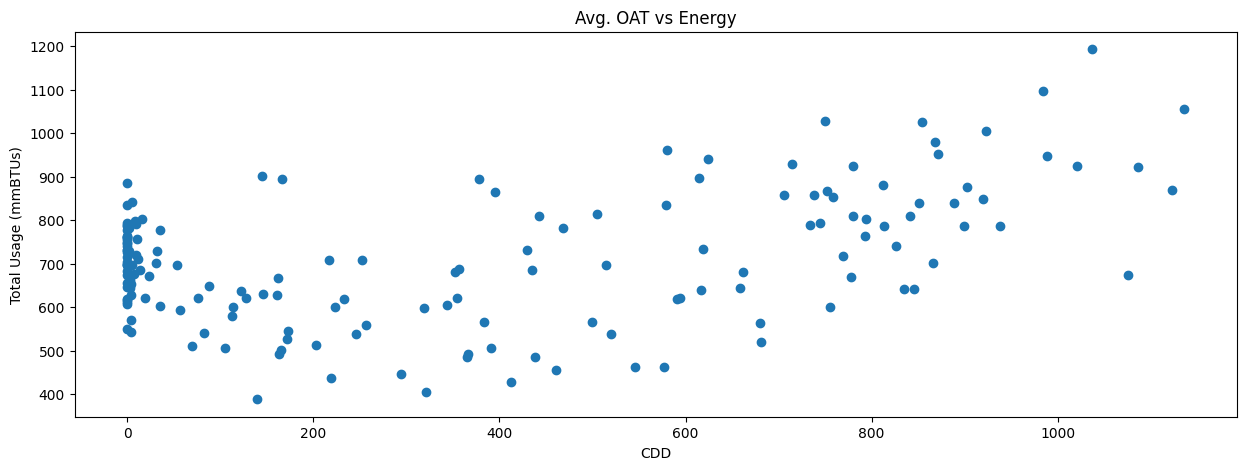

In [ ]:
#x = filtered_df['CDD']
y = filtered_df['Total Usage (mmBTUs)']
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.title (f"{Con_selected_category} vs Energy")
plt.xlabel("CDD")
plt.ylabel("Total Usage (mmBTUs)")

Text(0, 0.5, 'Gas (Therms)')

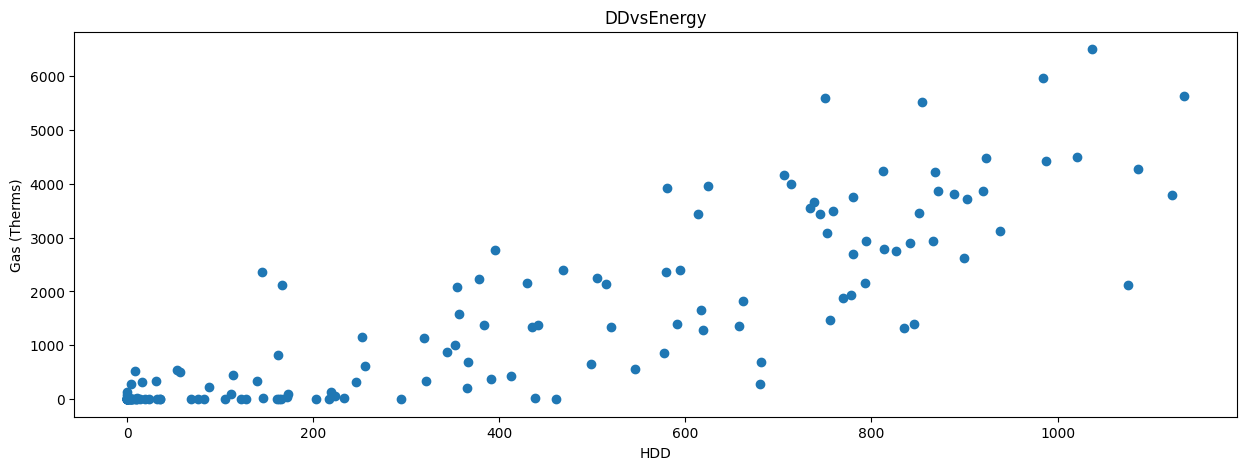

In [ ]:
x = filtered_df['HDD']
y = filtered_df['Gas (Therms)']
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.title ("DDvsEnergy")
plt.xlabel("HDD")
plt.ylabel("Gas (Therms)")

In [ ]:
trainingFY = [2016,2017,2018,2019,2020,2021]
testFY = [2022]

In [ ]:
#f_df = df[df['FacilityName'] == "Chatham Square Branch Library"]
f_df = filtered_df
trainingdata = f_df[f_df.index.year.isin(trainingFY)]
testdata= f_df[f_df.index.year.isin(testFY)]

In [ ]:
f_df.head()
testdata.head(3)

,FacilityName,Year,Month,FY,Avg. OAT,Precipitation (in),HDD,CDD,Electricity Cost ($),Electricity Demand (KW),Electricity Usage (KWH),Gas (Therms),Gas Cost ($),Steam (mlbs),Steam Cost ($),Total Cost ($),Total Usage (mmBTUs)
timestamp,,,,,,,,,,,,,,,,,
2022-12-01,Bronx Library Center,2022,12,2023,38.5,5.83,841.0,0.0,23494.44,280.0,152000.0,2904.0,5165.44,NaN,NaN,28659.88,809.17
2022-11-01,Bronx Library Center,2022,11,2023,50.9,3.15,442.0,12.0,29858.29,360.0,196800.0,1372.0,2577.42,NaN,NaN,32435.71,808.87
2022-10-01,Bronx Library Center,2022,10,2023,56.9,5.08,252.0,4.0,32107.71,344.0,173600.0,1147.0,2151.46,NaN,NaN,34259.17,707.19


In [ ]:
x_train = trainingdata.drop(['Electricity Usage (KWH)','Steam (mlbs)','Steam Cost ($)','FacilityName','Year','Month','FY','Electricity Cost ($)','Electricity Demand (KW)'], axis=1)
y_train = trainingdata['Electricity Usage (KWH)']

In [ ]:
x_test = testdata.drop(['Electricity Usage (KWH)','Steam (mlbs)','Steam Cost ($)','FacilityName','Year','Month','FY','Electricity Cost ($)','Electricity Demand (KW)'], axis=1)
y_test = testdata['Electricity Usage (KWH)']

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)
x_train.head()

,Avg. OAT,Precipitation (in),HDD,CDD,Gas (Therms),Gas Cost ($),Total Cost ($),Total Usage (mmBTUs)
timestamp,,,,,,,,
2021-12-01,43.8,1.39,658.0,0.0,1351.0,2195.77,22909.14,642.95
2021-11-01,46.3,1.13,546.0,0.0,560.0,903.69,17513.17,462.83
2021-10-01,62.0,5.26,112.0,37.0,89.0,214.56,23910.04,579.55
2021-09-01,70.3,10.03,7.0,192.0,0.0,35.01,24833.93,677.13
2021-08-01,77.6,10.32,0.0,406.0,0.0,33.89,23056.35,606.14


In [ ]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
predicted_vs_actual = pd.concat([y_test, pd.DataFrame(y_pred, index=y_test.index)], axis=1)

In [ ]:
predicted_vs_actual.head()

,Electricity Usage (KWH),0
timestamp,,
2022-12-01,152000.0,144680.0
2022-11-01,196800.0,158928.0
2022-10-01,173600.0,160616.0
2022-09-01,228000.0,221472.0
2022-08-01,230400.0,226248.0


In [ ]:
predicted_vs_actual.columns = ["Actual", "Predicted"]
predicted_vs_actual.head()

,Actual,Predicted
timestamp,,
2022-12-01,152000.0,144680.0
2022-11-01,196800.0,158928.0
2022-10-01,173600.0,160616.0
2022-09-01,228000.0,221472.0
2022-08-01,230400.0,226248.0


<Axes: xlabel='timestamp'>

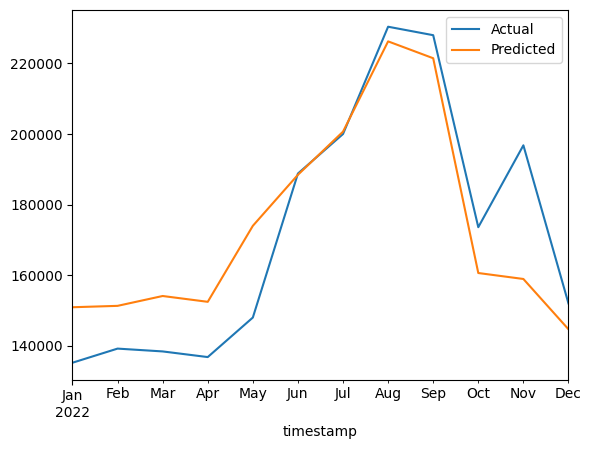

In [ ]:
predicted_vs_actual.plot()

In [ ]:
ytrain_table = pd.DataFrame(y_train)
ytrain_table.columns = ["Actual"]

<Axes: xlabel='timestamp'>

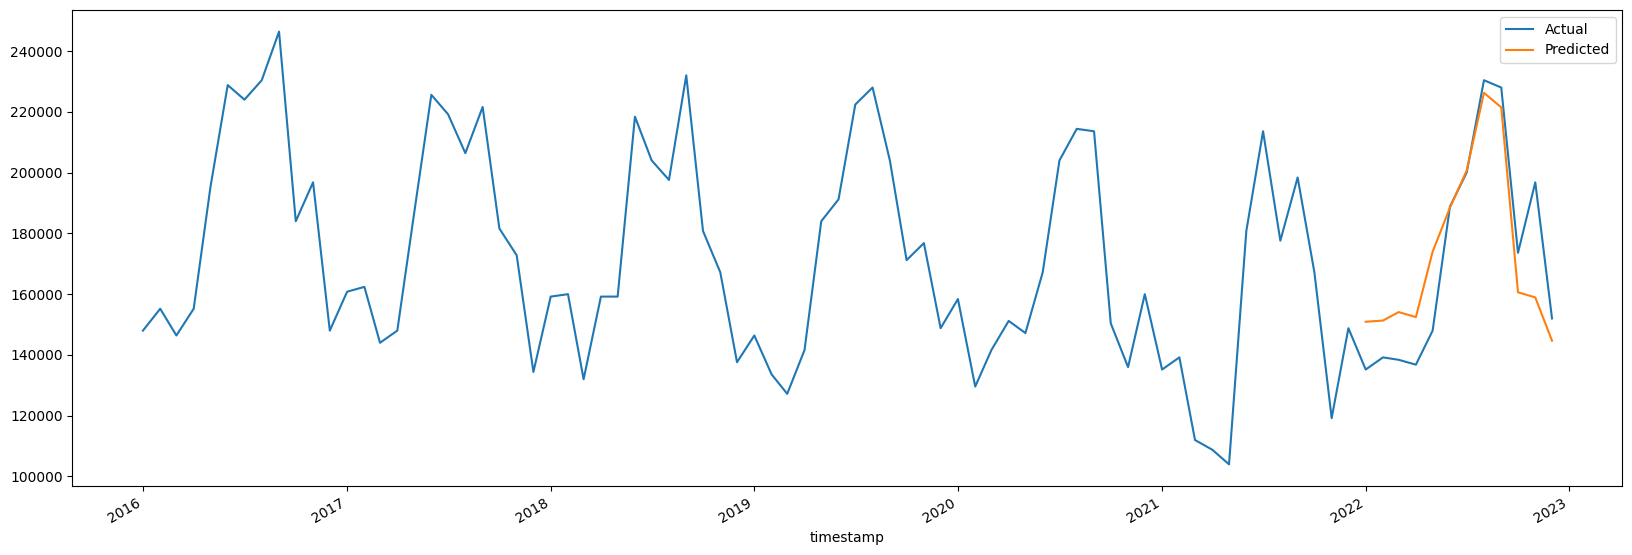

In [ ]:
predicted_vs_actual_plus_training = pd.concat([ytrain_table, predicted_vs_actual], sort=True)
predicted_vs_actual_plus_training.plot(figsize=(20,7))

In [ ]:
Baseline_Period = [2021,2022]
Baseline_Usage= ytrain_table[ytrain_table.index.year.isin(Baseline_Period)]

,Actual
timestamp,
2021-12-01,148800.0
2021-11-01,119200.0
2021-10-01,167200.0
2021-09-01,198400.0
2021-08-01,177600.0


Text(0, 0.5, 'kWH')

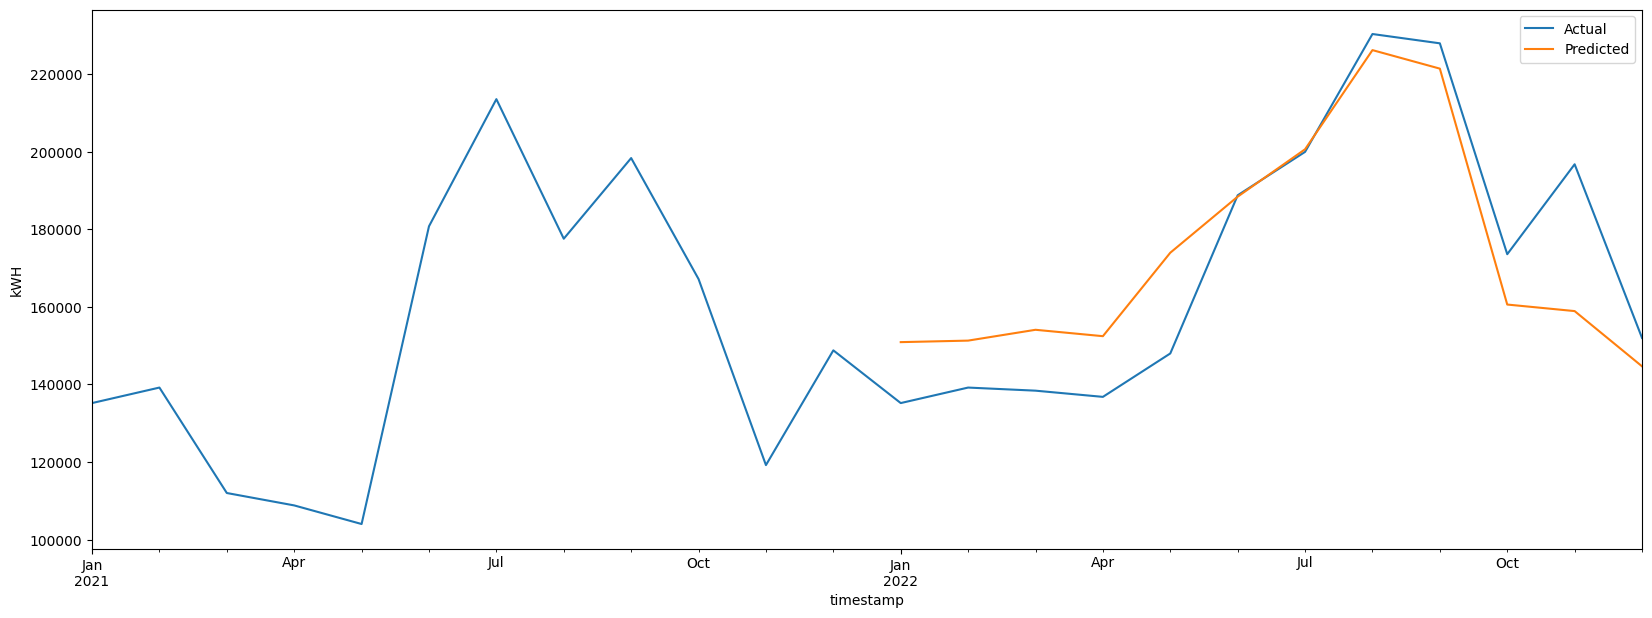

In [ ]:
Baseline_Usage_vs_actual_plus_training = pd.concat([predicted_vs_actual, Baseline_Usage], sort=True)
Baseline_Usage_vs_actual_plus_training.plot(figsize=(20,7))
plt.ylabel("kWH")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_rmse = rmse / y_test.mean() * 100

print("MSE:", mse)
print("RMSE:", rmse)
print("Mean Absolute Error:", mae)
print('CV-RMSD:', cv_rmse)
print("R-squared:", r2)

MSE: 273133130.6666667
RMSE: 16526.73986806432
Mean Absolute Error: 12921.333333333334
CV-RMSD: 9.593695743845387
R-squared: 0.7659465189969836
